加载数据

In [1]:
import pandas as pd
data = pd.read_csv('../datasets/Advertising.csv')
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


数学建模，建立TV-Sales、Radio-Sales、Newspaper-Sales的散点图

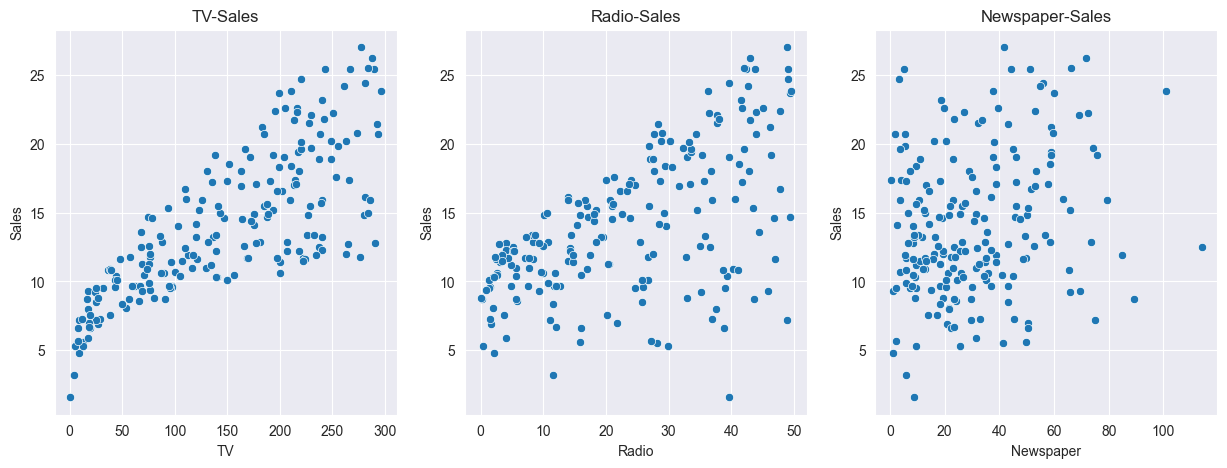

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(x=data['TV'],y=data['Sales'],ax=ax[0])
ax[0].set_title('TV-Sales')

sns.scatterplot(x=data['Radio'],y=data['Sales'],ax=ax[1])
ax[1].set_title('Radio-Sales')

sns.scatterplot(x=data['Newspaper'],y=data['Sales'],ax=ax[2])
ax[2].set_title('Newspaper-Sales')

plt.show()

可以发现，Newspaper和Sales没有明显的线性关系

线性回归建模

Sales=θ₀+θ ₁×TV+θ₂×Radio+θ₃×Newspaper

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

x=data[['TV','Radio','Newspaper']]
y=data['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

print("回归系数:",model.coef_)
print("截距:",model.intercept_)

回归系数: [0.04472952 0.18919505 0.00276111]
截距: 2.9790673381226256


Sales = 2.979067381226256 + 0.04472952xTV + 0.18919505xRadio + 0.00276111xNewspaper

模型评估

In [4]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("均方误差(MSE):",mse)
print("R² 分数:",r2)

均方误差(MSE): 3.174097353976104
R² 分数: 0.899438024100912


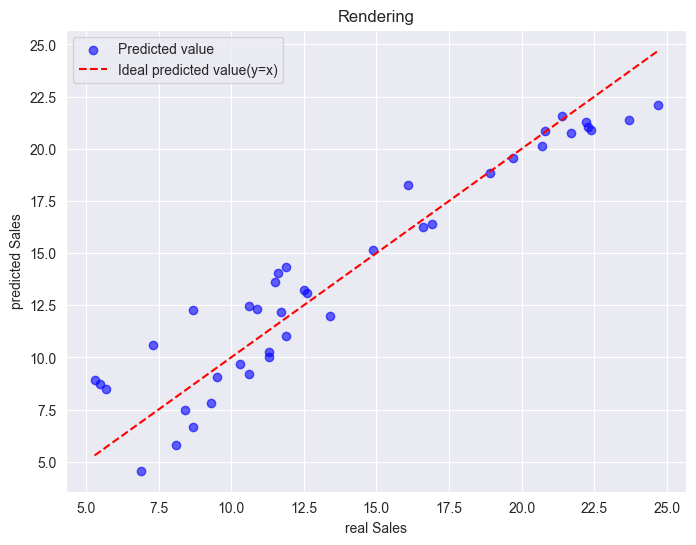

In [5]:
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred, color='blue', label='Predicted value',alpha=0.6)

x = np.linspace(min(y_test),max(y_test),100)
plt.plot(x,x,color="red",linestyle="--",label="Ideal predicted value(y=x)")

plt.xlabel("real Sales")
plt.ylabel("predicted Sales")
plt.title("Rendering")
plt.legend()
plt.grid(True)
plt.show()